In [1]:
print('Hello Team!')

Hello Team!


In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress
# import plotly.express as px #function for hover functions

In [2]:
# Store filepath into variable
anxiety_csv = Path("Resources/anxiety_attack_dataset.csv")
# Read in files.
anxiety_df = pd.read_csv(anxiety_csv)

In [3]:
#quick statistical analysis
anxiety_df.describe()

,ID,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Severity of Anxiety Attack (1-10)
count,12000.00000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,40.96675,6.482650,5.030892,246.696083,9.492833,5.462250,119.398500,25.462333,2.987417,4.518417,5.497333,5.507583
std,3464.24595,13.47328,2.014885,2.889000,144.487071,5.769364,2.897201,34.806711,8.090686,1.414482,2.866010,2.867579,2.858663
min,1.00000,18.00000,3.000000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,3000.75000,29.00000,4.800000,2.500000,122.000000,5.000000,3.000000,89.000000,18.000000,2.000000,2.000000,3.000000,3.000000
50%,6000.50000,41.00000,6.500000,5.000000,244.000000,9.000000,5.000000,119.000000,25.000000,3.000000,5.000000,5.000000,6.000000
75%,9000.25000,53.00000,8.200000,7.525000,371.000000,15.000000,8.000000,149.000000,32.000000,4.000000,7.000000,8.000000,8.000000
max,12000.00000,64.00000,10.000000,10.000000,499.000000,19.000000,10.000000,179.000000,39.000000,5.000000,9.000000,10.000000,10.000000


In [4]:
#list of columns
anxiety_df.columns

Index(['ID', 'Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)',
       'Heart Rate (bpm during attack)', 'Breathing Rate (breaths/min)',
       'Sweating Level (1-5)', 'Dizziness', 'Medication',
       'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Severity of Anxiety Attack (1-10)'],
      dtype='object')

In [5]:
#Renaming columns that I am pulling from (updating Severity of Anxiety Attack to Severity)
anxiety_df.columns = ['ID', 'Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)',
       'Heart Rate (bpm during attack)', 'Breathing Rate (breaths/min)',
       'Sweating Level (1-5)', 'Dizziness', 'Medication',
       'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Severity'
]
anxiety_df.head(5)

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


In [9]:
#Organize by age, gender, and severity, setting severity as index
organized_anxiety_df = anxiety_df[['Gender', 'Age', 'Severity']].set_index('Severity')
organized_anxiety_df.head()

,Gender,Age
Severity,,
10,Female,56
8,Male,46
5,Female,32
8,Male,60
1,Male,25


In [10]:
#sort in descending order for age
organized_anxiety_df.sort_values(by=['Age'], ascending=[True], inplace=True)
organized_anxiety_df.head()

,Gender,Age
Severity,,
3,Female,18
8,Female,18
10,Female,18
1,Male,18
8,Male,18


In [11]:
#sort in descending order for severity
organized_anxiety_df.sort_values(by=['Severity'], ascending=[True], inplace=True)
organized_anxiety_df.head()

,Gender,Age
Severity,,
1,Male,64
1,Male,46
1,Female,46
1,Male,24
1,Male,46


In [12]:
#showing the number of age count duplicates
organized_anxiety_df["Age"].value_counts()

Age
43    295
34    284
30    280
40    279
64    274
46    274
45    273
35    270
42    269
62    268
50    267
33    266
52    265
19    264
39    263
21    262
59    262
54    261
49    261
56    260
36    260
38    258
29    258
32    257
41    256
25    255
28    252
20    252
26    251
27    250
23    250
53    248
61    247
18    246
51    246
37    245
47    243
58    242
55    242
22    239
60    238
57    237
31    234
48    231
24    227
63    226
44    213
Name: count, dtype: int64

In [9]:
# Top 500
organized_anxiety_df.head(500)

#Bottom 500
organized_anxiety_df.tail(500)

,Gender,Age
Severity,,
10,Male,62
10,Male,44
10,Female,34
10,Male,45
10,Female,50
...,...,...
10,Female,41
10,Female,51
10,Male,23


## What is the relationship between the severity of anxiety attacks and demographics such as age, gender, and occupation

### Age and Severity

In [13]:
# remove dupes of ages
# limited_anxiety_df = anxiety_df.drop_duplicates(subset=['Age'])
# limited_anxiety_df

# group by age ranges using bins
age_groups = [18,25,35,45,55,65]
group_names = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
anxiety_df['Group Name'] = pd.cut(anxiety_df['Age'], age_groups, labels=group_names, include_lowest=True)
anxiety_df.head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,...,Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity,Group Name
0,1,56,Female,Other,9.6,8.3,175,6,No,No,...,145,33,3,No,No,4,Yes,9,10,Group 5
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,...,143,18,5,Yes,No,0,No,9,8,Group 4
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,...,60,34,1,No,No,7,Yes,10,5,Group 2
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,...,94,19,1,No,Yes,4,Yes,5,8,Group 5
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,...,152,15,4,No,Yes,0,No,1,1,Group 1


In [14]:
#severity and age original before organized df (below) - still should give the same output
mean = anxiety_df.groupby('Severity')['Age'].mean()
median = anxiety_df.groupby('Severity')['Age'].median()
variance = anxiety_df.groupby('Severity')['Age'].var()
std_dev = anxiety_df.groupby('Severity')['Age'].std()
sem = anxiety_df.groupby('Severity')['Age'].sem()

#new data frame
age_df = pd.DataFrame({
        'Age Mean': mean,
        'Age Median': median,
        'Age Var': variance,
        'Age Std Dev': std_dev,
        'Age Std Err': sem
})
age_df

,Age Mean,Age Median,Age Var,Age Std Dev,Age Std Err
Severity,,,,,
1,40.868443,41.0,172.889345,13.148739,0.379413
2,42.270638,42.0,183.037425,13.529132,0.394685
3,40.868398,41.0,187.402077,13.689488,0.402806
4,41.270383,41.0,185.521337,13.620622,0.392866
5,40.891547,41.0,179.370511,13.392928,0.378205
6,40.661765,40.0,183.802102,13.557363,0.387511
7,40.607026,40.0,175.669648,13.254043,0.378842
8,41.453243,42.0,180.455443,13.433370,0.389906
9,39.979009,40.0,187.812164,13.704458,0.397106


Here is a quick overview for the statistical analysis on a deeper level against the severity levels

In [43]:
#showing only columns I am focusing on
focus_columns_df = anxiety_df[['Age', 'Gender', 'Occupation', 'Severity']]
focus_columns_df.head()

,Age,Gender,Occupation,Severity
0,56,Female,Other,10
1,46,Male,Teacher,8
2,32,Female,Doctor,5
3,60,Male,Doctor,8
4,25,Male,Student,1


### Age

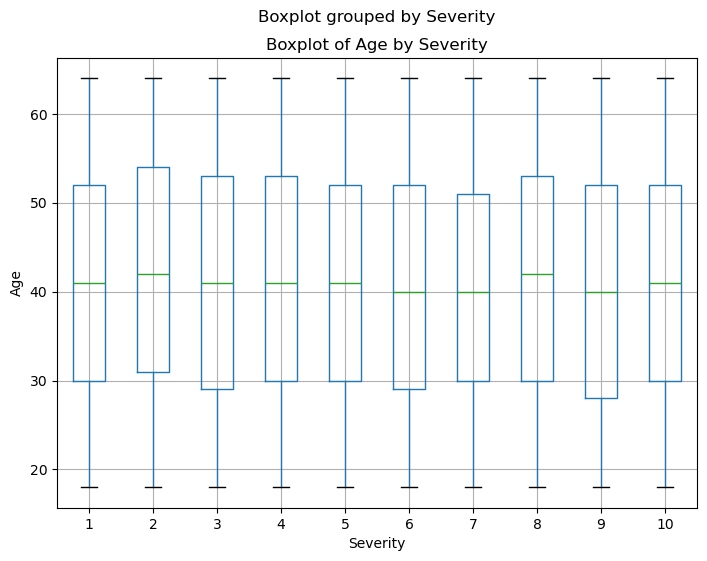

In [45]:
# Create the boxplot
age_severity_df = focus_columns_df.boxplot('Age', by='Severity', figsize=(8, 6))

# Set title and labels
plt.title("Boxplot of Age by Severity")
# plt.suptitle("")  # Remove automatic "by group" title
plt.xlabel("Severity")
plt.ylabel("Age")

# Save the figure
plt.savefig("Outputs/Age_by_Severity_Boxplot.png", bbox_inches='tight')

# Show the plot
plt.show()

<Axes: title={'center': 'Age'}, xlabel='Severity'>

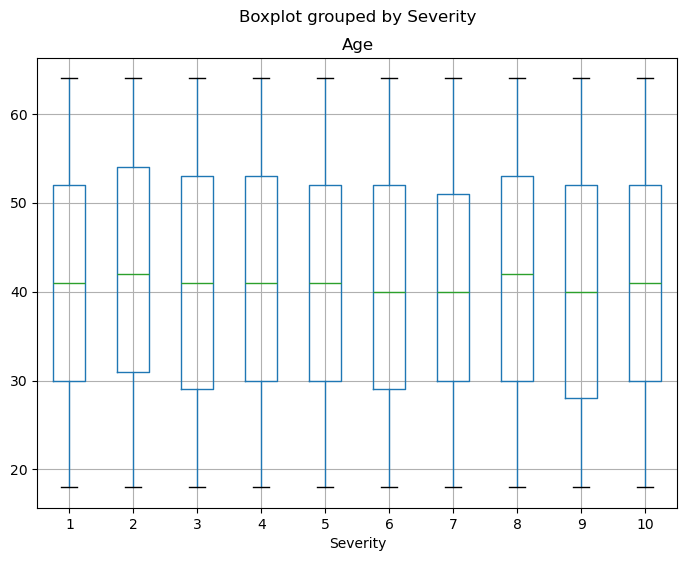

In [44]:
#boxplot to compare age and severity
focus_columns_df.boxplot('Age', by='Severity', figsize=(8, 6))

This box plot shows that there is no major differences between the age groups and their ranges in severity levels against the age range in the data set.

In [15]:
#sort by just age and severity level
age_df = anxiety_df[['Age', 'Severity', 'Group Name']]
age_df.head()

,Age,Severity,Group Name
0,56,10,Group 5
1,46,8,Group 4
2,32,5,Group 2
3,60,8,Group 5
4,25,1,Group 1


In [16]:
#age counts
age_count_df = organized_anxiety_df.groupby(['Severity', 'Age']).size().unstack(fill_value=0)
print(age_count_df)

Age       18  19  20  21  22  23  24  25  26  27  ...  55  56  57  58  59  60  \
Severity                                          ...                           
1         24  27  20  22  14  33  26  23  26  34  ...  23  30  28  19  32  23   
2         15  25  20  27  23  20  11  24  27  15  ...  26  25  27  44  28  23   
3         20  32  24  27  22  26  18  26  28  32  ...  21  21  26  22  18  19   
4         28  24  20  31  25  20  22  27  32  18  ...  22  18  20  26  30  26   
5         20  33  30  26  24  27  25  21  24  24  ...  36  17  22  25  29  17   
6         31  25  30  28  26  19  33  26  25  20  ...  17  28  26  20  26  28   
7         26  30  31  21  22  26  19  28  21  26  ...  26  25  20  24  25  22   
8         30  17  20  23  25  18  21  24  23  33  ...  31  30  20  23  28  28   
9         33  30  30  22  30  36  24  33  20  30  ...  16  26  23  18  23  30   
10        19  21  27  35  28  25  28  23  25  18  ...  24  40  25  21  23  22   

Age       61  62  63  64  


### Gender

In [ ]:
#severity and gender stats
# need to create a df that will show the severity levels and their gender counts
gender_df = anxiety_df.groupby(["Severity", "Gender"]).size().unstack(fill_value=0)
# gender_df = organized_anxiety_df.groupby(["Severity", "Gender"]).size().unstack(fill_value=0)

# Display result (maybe get rid of other category)
gender_df
# print(gender_df)

Gender,Female,Male,Other
Severity,,,
1,599,563,39
2,573,549,53
3,572,546,37
4,564,584,54
5,609,603,42
6,599,575,50
7,573,596,55
8,601,547,39
9,554,587,50


In [19]:
#only show male/female genders with Severity as index
df_selected = gender_df[["Female", "Male"]]
df_selected

Gender,Female,Male
Severity,,
1,599,563
2,573,549
3,572,546
4,564,584
5,609,603
6,599,575
7,573,596
8,601,547
9,554,587


In [20]:
#female count with severity levels
female_df = organized_anxiety_df[organized_anxiety_df['Gender'] =='Female']
female_df.head()

female_severity_df = female_df.groupby(["Severity", "Gender"]).size().unstack(fill_value=0)
print(female_severity_df)

Gender    Female
Severity        
1            599
2            573
3            572
4            564
5            609
6            599
7            573
8            601
9            554
10           565


In [26]:
#male count with respect to the serverity levels
male_df = organized_anxiety_df[organized_anxiety_df['Gender'] =='Male']
female_df.head()

male_severity_df = male_df.groupby(["Severity", "Gender"]).size().unstack(fill_value=0)
print(male_severity_df)

Gender    Male
Severity      
1          563
2          549
3          546
4          584
5          603
6          575
7          596
8          547
9          587
10         573


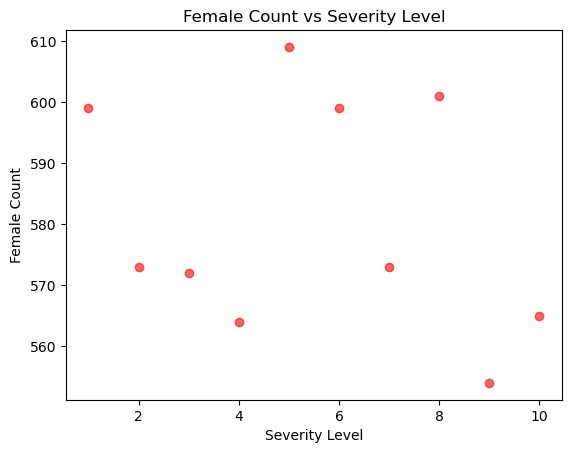

In [ ]:
#scatter plot of female count vs severity (regression one below might be better?)
plt.scatter(df_selected.index, df_selected["Female"], color='red', alpha=0.6)

# Labels and title
plt.xlabel("Severity Level")
plt.ylabel("Female Count")
plt.title("Female Count vs Severity Level")

#save the fig
plt.savefig('Outputs/Female_Count_vs_Severity_Level.png')

# Show the plot
plt.show()

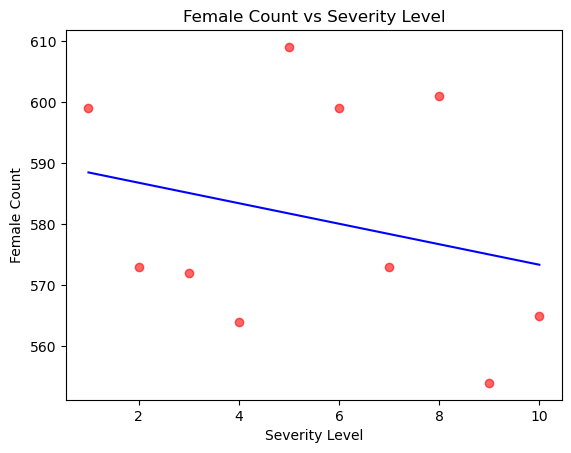

In [39]:
# Generate regression values
x = df_selected.index  # Severity Level
y = df_selected['Female']  # Female Count

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate regression line
regression_line = slope * x + intercept

# Create scatter plot
plt.scatter(x, y, color='red', alpha=0.6, label="Data Points")

# Plot regression line
plt.plot(x, regression_line, color='blue', label="Regression Line")

# Labels and title
plt.xlabel("Severity Level")
plt.ylabel("Female Count")
plt.title("Female Count vs Severity Level")

#slope intercept equation
# equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
# plt.text(min(x), max(y), equation_text, fontsize=12, color="black", bbox=dict(facecolor="white", alpha=0.5))

# Add legend
# plt.legend()

# Save the figure
plt.savefig('Outputs/Female_Count_Regression.png')

# Show the plot
plt.show()

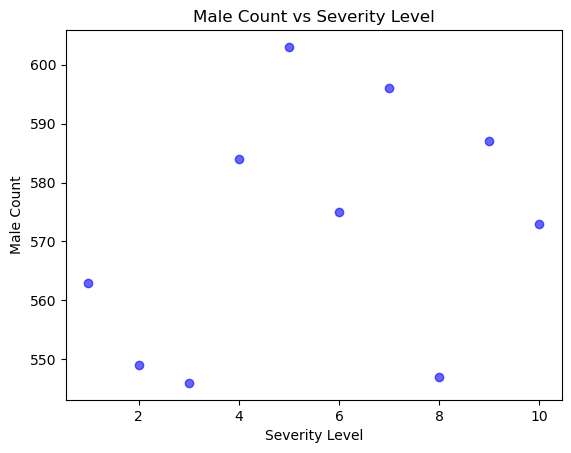

In [ ]:
#scatter plot of male count vs severity (regression one below might be a better one?)
plt.scatter(df_selected.index, df_selected["Male"], color='blue', alpha=0.6)
# plt.plot(df_selected['Severity'], regression_line, color='red', label='Regression Line')

# Labels and title
plt.xlabel("Severity Level")
plt.ylabel("Male Count")
plt.title("Male Count vs Severity Level")

#save the fig
plt.savefig('Outputs/Male_Count_vs_Severity_Level.png')

# Show the plot
plt.show()

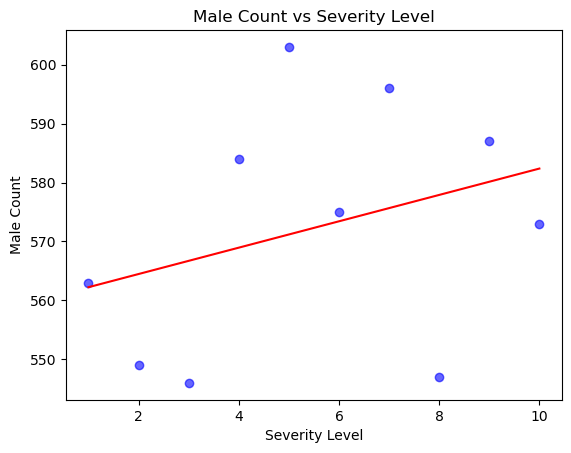

In [40]:
# Generate regression values
x = df_selected.index  # Severity Level
y = df_selected["Male"]  # Male Count

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate regression line
regression_line = slope * x + intercept

# Create scatter plot
plt.scatter(x, y, color='blue', alpha=0.6, label="Data Points")

# Plot regression line
plt.plot(x, regression_line, color='red', label="Regression Line")

# Labels and title
plt.xlabel("Severity Level")
plt.ylabel("Male Count")
plt.title("Male Count vs Severity Level")

# Add legend
# plt.legend()

# Save the figure
plt.savefig('Outputs/Male_Count_Regression.png')

# Show the plot
plt.show()

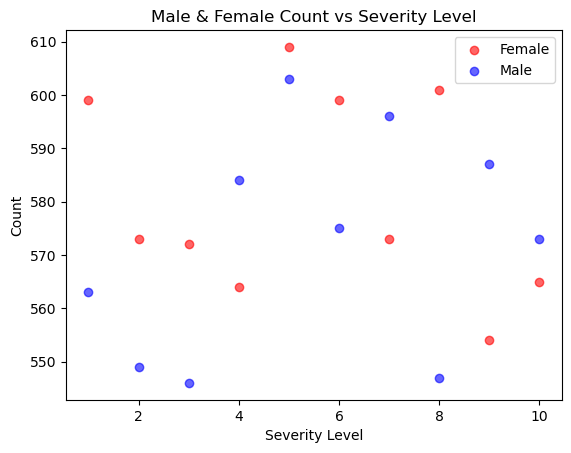

In [23]:
#scatter of both genders combined

# Scatter plot for Female
plt.scatter(df_selected.index, df_selected["Female"], color='red', alpha=0.6, label="Female")

# Scatter plot for Male
plt.scatter(df_selected.index, df_selected["Male"], color='blue', alpha=0.6, label="Male")

# Labels and title
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.title("Male & Female Count vs Severity Level")

#save the fig
plt.savefig('Outputs/Male&Female_Count_vs_Severity_Level.png')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [21]:
#correlation calculation for female/male vs severity
correlation, p_value = pearsonr(df_selected["Male"], df_selected["Female"])

# Display results
print(f"Pearson correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson correlation coefficient: -0.0389
P-value: 0.9149


The p-value calculated proposes that there is no real correlation between gender and the anxiety levels.

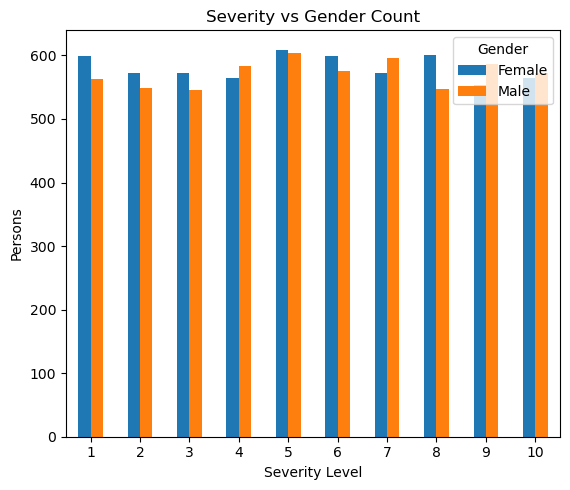

In [ ]:
#severity and gender bar graph (removed other gender category) - might want to move above the scatterplots(?)
df_selected.plot(kind='bar', figsize=(5.8, 5)) #creating bar plot

# Add titles and labels
plt.title('Severity vs Gender Count')
plt.xlabel('Severity Level')
plt.xticks(rotation=0)
plt.ylabel('Persons')

#save the fig
plt.savefig('Outputs/Bar_Severity_Levels_vs_Gender_Count.png')

#plotting
plt.tight_layout()
plt.show()

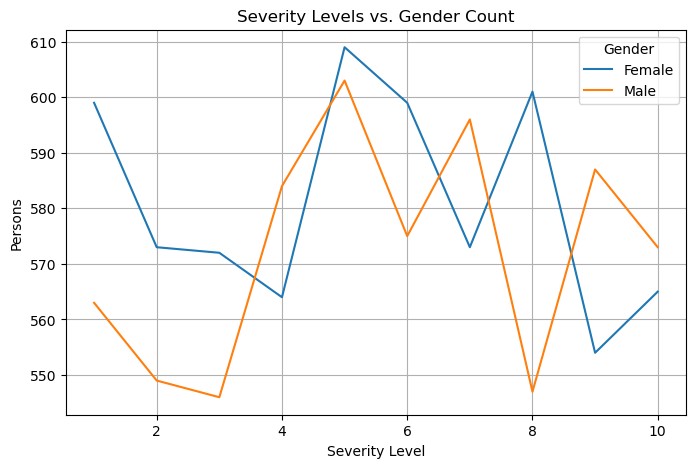

In [24]:
#line plot of severity and gender count
df_selected.plot(kind="line", figsize=(8, 5))

# Customize the plot
plt.xlabel("Severity Level")
plt.ylabel("Persons")
plt.title("Severity Levels vs. Gender Count")
plt.legend(title="Gender")
plt.grid(True)

#save the fig
plt.savefig('Outputs/Line_Severity_Levels_vs_Gender_Count.png')

# Show the plot
plt.show()

### Occupation and Severity

In [8]:
#severity and occcupation
occupation_df = anxiety_df.groupby(["Severity", "Occupation"]).size().unstack(fill_value=0)

# Display result
occupation_df
# print(occupation_df)

Occupation,Doctor,Engineer,Other,Student,Teacher,Unemployed
Severity,,,,,,
1,198,208,200,202,176,217
2,206,208,179,178,193,211
3,198,186,188,197,187,199
4,193,193,190,204,202,220
5,232,209,195,214,207,197
6,201,177,200,193,213,240
7,197,188,224,195,215,205
8,189,206,183,214,191,204
9,204,189,214,177,205,202


In [46]:
#occupation df
occupation_df = focus_columns_df[['Occupation', 'Severity']]. set_index('Severity')
occupation_df.head()

,Occupation
Severity,
10,Other
8,Teacher
5,Doctor
8,Doctor
1,Student


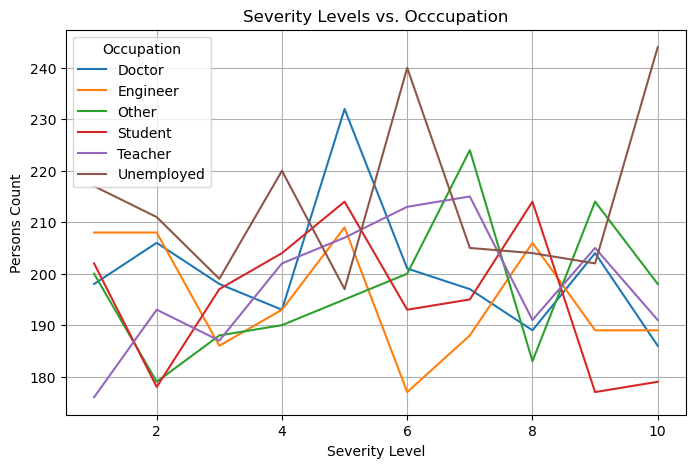

In [9]:
#scatter plot
occupation_df.plot(kind="line", figsize=(8, 5))

# Customize the plot
plt.xlabel("Severity Level")
plt.ylabel("Persons Count")
plt.title("Severity Levels vs. Occcupation")
plt.legend(title="Occupation", loc='upper left')
plt.grid(True)

#save the fig
plt.savefig('Outputs/Severity_Levels_vs_Occupation.png')

# Show the plot
plt.show()

One prominent thing you can notice from the graph above is taht the unemployed category shows the highest number of people against each severity level. One the other hand, you can see that students seem to have the lower number of person counts against each severity level.

## Correlations

### Gender and Age

In [41]:
# merging the age and gender df to compare the two categories + setting severity as index
merged_df = pd.merge(age_df, df_selected, on='Severity').set_index('Severity')

#sorting in descending order on Severity
merged_df.sort_values(by=['Severity'], ascending=[True], inplace=True)

merged_df.head()
# print(merged_df)

,Age,Group Name,Female,Male
Severity,,,,
1,63,Group 5,599,563
1,39,Group 3,599,563
1,60,Group 5,599,563
1,58,Group 5,599,563
1,34,Group 2,599,563


In [ ]:
organized_anxiety_df.head()

In [42]:
#correlation calculation for female/male vs severity
correlation, p_value = pearsonr(merged_df["Male"], merged_df["Female"])

# Display results
print(f"Pearson correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson correlation coefficient: -0.0301
P-value: 0.0010


Conclussion for above p-value of 0.0010
This data suggests there is no true correlation between genders and the severity of the anxiety attacks.

In [10]:
# age_counts = anxiety_df['Age'].value_counts()
# plt.pie(age_counts, labels=age_counts.index, autopct='%1.1%', startangle=140')
# plt.show()